In [1]:
# Lecture 7: MCMC

In [2]:
# We also know that importance sampling is better but to use that we need to know the normalization. 
# The wish is to do importance sampling without having to know the normalization, and that is what MCMC 
# is all about. 

In [4]:
%matplotlib inline 
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns

Markov Chains
As an example consider a life insurance company that wants to find out how much money to charge its clients. The company wants to estimate how long the clients will live. It proposes the following model summarizing the state of health of an individual on a monthly basis: healthy, sick and dead with transition graph.

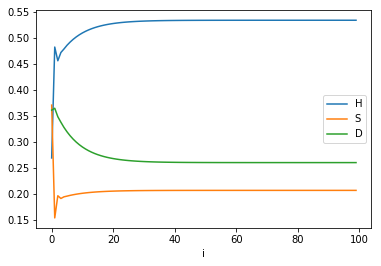

In [5]:
# Simple example for MARKOV CHAIN
# transition matrix
T = np.array([[0.69, 0.3, 0.01], [0.8, 0.1, 0.1], [0, 0.1 ,0.9]])


# initial state USE RANDOM NUMBERS
p = np.random.uniform(low=0,high=1, size=3)
p = p/np.sum(p)

q=np.zeros((100,3))
for i in np.arange(0,100):
    q[i, :] = np.dot(p,np.linalg.matrix_power(T,i))

plt.plot(q)
plt.xlabel('i')
plt.legend( ('H', 'S', 'D'))

In [6]:
# The Metropolis-Hastings algorithm

In [7]:
# Example1
# In this example we sample from $p(x) =6x(1-x)$ using the Metropolis algorithm with proposal distribution 

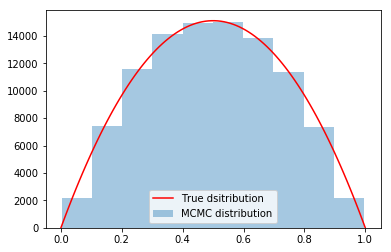

In [8]:
## FUNCTIONS 
# target distribution p(x) 
p = lambda x: 6*x*(1-x)

# number of samples
n = 100000

sig =0.10


#intitialize the sampling. Start somewhere from 0..1
x0 = np.random.uniform()


x_prev = x0

x=[]
k=1
i=0
while i<n:
    
    x_star = np.random.normal(x_prev, sig)
    while  (x_star <0) | (x_star > 1):  # MAKE SURE WE STAY WITHIN BOUNDS
        x_star = np.random.normal(x_prev, sig)
    
    
    
    P_star = 6*x_star*(1-x_star) #p(x_star);
    P_prev = 6*x_prev*(1-x_prev) #p(x_prev);
    U =  np.random.uniform()
    
    A =  P_star/P_prev
    if U < A:
        x.append(x_star)
        i = i + 1
        x_prev = x_star
    else :
        x.append(x_prev)
        x_prev = x[i]  
        i = i + 1
 
        k=k+1

    
e,q,h=plt.hist(x,10, alpha=0.4, label=u'MCMC distribution') 


xx= np.linspace(0,1,100)
plt.plot(xx, 0.67*np.max(e)*p(xx), 'r', label=u'True dsitribution') 
plt.legend()

In [9]:
# The normal distribution

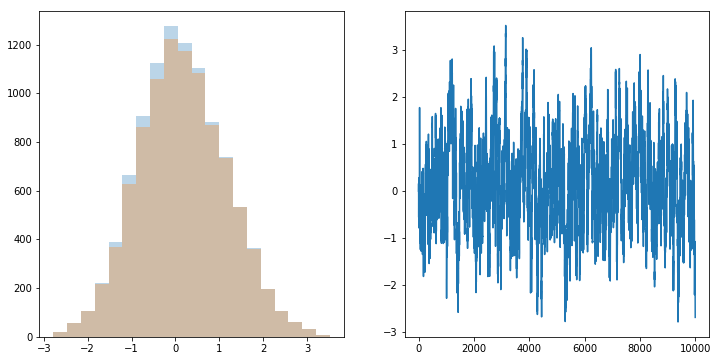

In [10]:
plt.figure(figsize=[12,6])

from scipy.stats import norm
# the target distribution
p = lambda x: norm.pdf(x)

delta = .5
# proposal distribution rule (random -delta .. delta) 
q = lambda x: x + np.random.uniform()*2*delta - delta;  

# number of samples
n = 10000


# start somewhere from 0..1
x0 = np.random.uniform()
x=np.zeros(n)

x_prev = x0

k=1
i=1
while i<n:
    
    x_star = q(x_prev)
   
    
    P_star = p(x_star)
    P_prev = p(x_prev)
    U = np.random.uniform()
    
    A = np.min((1, P_star/P_prev))
   
    if U <= A:
        x[i] = x_star
        i = i + 1
        x_prev = x_star
    else:
        x[i] = x_prev
        x_prev = x[i]  
        i = i + 1
        k=k+1

# =======
# PLOTTING
plt.subplot(1,2,1)
fig = plt.hist(x, 20, alpha=0.3)
fig = plt.hist(x[300:], 20, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(x)

In [11]:
# Metropolis-Hastings for Multivariate Distributions

In [12]:
# Suppose we want to sample from the bivariate normal distribution

In [13]:
xmin =-2; xmax = 2
ymin =-2; ymax = 2

sig_x = 0.1
sig_y = 0.1

n = 90000
# FUNCTIONS
p= lambda x,y:  np.exp(-x**2/2.0) * np.exp(-y**2/2.)

## NOW LETS BUILD OUR MH
# start from a random position 
np.random.seed(seed=10)
x0=np.random.normal()
y0=np.random.normal()
x_prev =x0
y_prev =y0


x = np.zeros(n)
y = np.zeros(n)
i=0
while i<n:


    # take a random step ~N(0,1) - proposal first in X 
    x_star = np.random.normal(x_prev, sig_x)
    
    
    P_star = p(x_star,y_prev)
    P_prev = p(x_prev, y_prev)
    A =  P_star/P_prev   # Acceptance probability. Since q is symmetric I do Metropolis
    U = np.random.uniform();
    

    if (U < A):
        x[i] = x_star
        i = i + 1
        x_prev = x_star
    else: 
        x[i] = x_prev
        x_prev = x[i]
        i = i + 1
    
    i=i-1
    # now lets do the y step 
    y_star =  np.random.normal(y_prev, sig_y)
    
    P_star = p(x_prev,y_star)
    P_prev = p(x_prev, y_prev)
    A =  P_star/P_prev
    
    U = np.random.uniform()
     
    if U < A:
        y[i] = y_star
        i = i + 1
        y_prev = y_star
    else: 
        y[i] = y_prev
        y_prev = y[i];  
        i = i + 1


x_mean= np.mean(x)
y_mean= np.mean(y)
np.std(x)
np.std(y)

1.0046441376573731

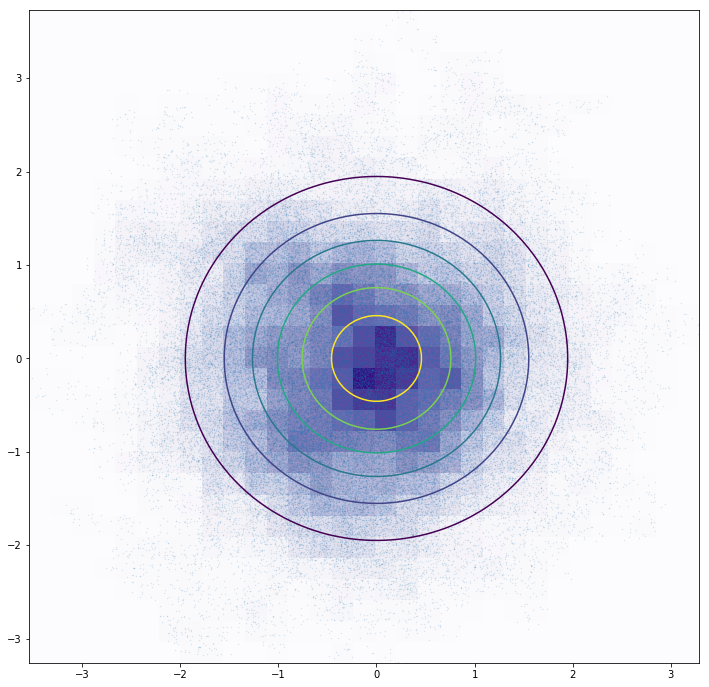

In [14]:
# PLOTTING
plt.figure(figsize=[12,12])
counts,xd,yd,fig=plt.hist2d(x,y,31, cmap="Purples");
#or try plt.hexbin(x,y, cmap="Purples")

xt,yt = np.meshgrid(np.linspace(-3,3, 100),np.linspace(-3,3,100))

plt.contour(xt,yt,  np.exp(-xt**2/2) * np.exp(-yt**2/2))

plt.scatter(x,y, 0.1, alpha=0.2, cmap="BuGn")

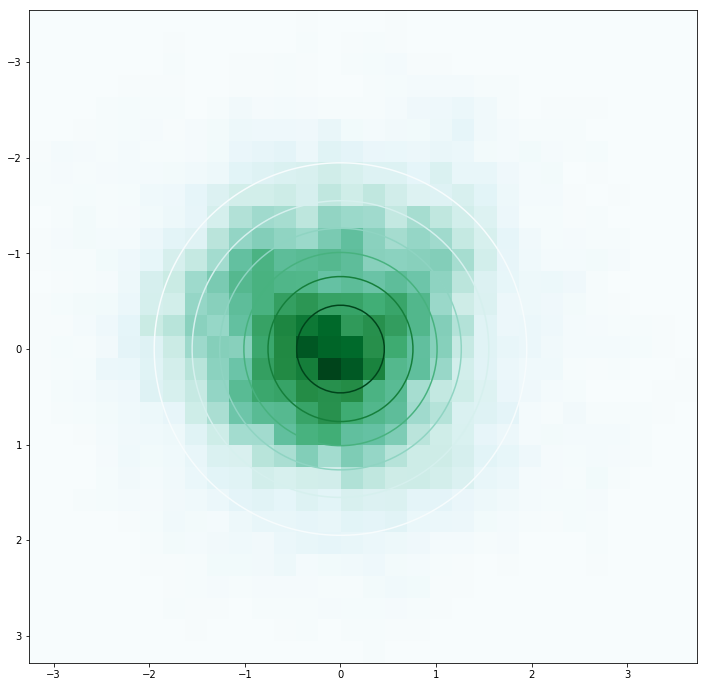

In [15]:
plt.figure(figsize=[12,12])
H, xedges, yedges = np.histogram2d(x, y, bins=(30,30))


extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

plt.imshow(H, extent=extent, interpolation='nearest', cmap="BuGn")
xt,yt = np.meshgrid(np.linspace(-3,3, 100),np.linspace(-3,3,100))
#plt.contour(xd[1:],yd[1:],counts, alpha=0.3)

plt.contour(xt,yt,  np.exp(-xt**2/2) * np.exp(-yt**2/2), cmap="BuGn")

In [16]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-7.html